# Import Nessecery Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import pylab
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   company        301 non-null    object 
 2   Year           301 non-null    int64  
 3   Selling_Price  301 non-null    float64
 4   Present_Price  301 non-null    float64
 5   Kms_Driven     301 non-null    int64  
 6   Fuel_Type      301 non-null    object 
 7   Seller_Type    301 non-null    object 
 8   Transmission   301 non-null    object 
 9   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 23.6+ KB


There is no null values in this dataset

# 

# Univariate Analysis

In [6]:
df['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [7]:
df['company'].value_counts()

honda            70
maruti suzuki    50
hyndai           50
other            39
toyota           36
bajaj            25
hero             15
yamaha            8
tvs               8
Name: company, dtype: int64

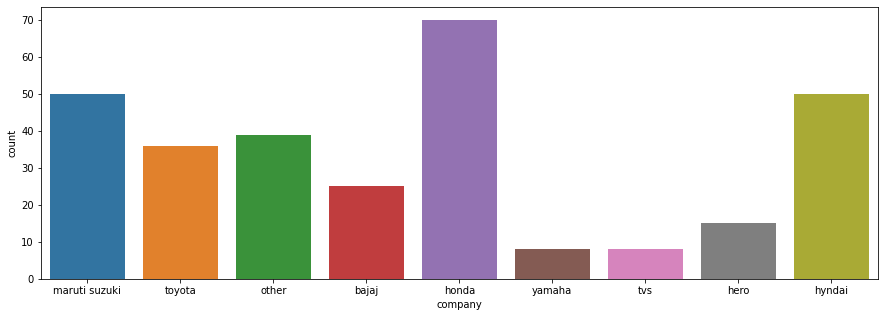

In [8]:
plt.figure(figsize=(15,5))
sns.countplot(df['company']);

In [9]:
df['Year'].value_counts()

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

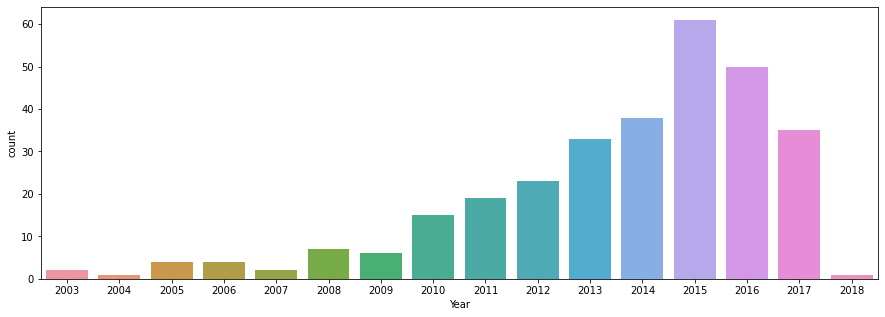

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(df['Year']);

In [11]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

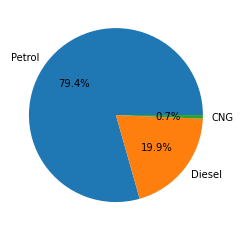

In [12]:
plt.pie(df['Fuel_Type'].value_counts(),labels=['Petrol','Diesel','CNG'],autopct='%.1f%%');

In [13]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

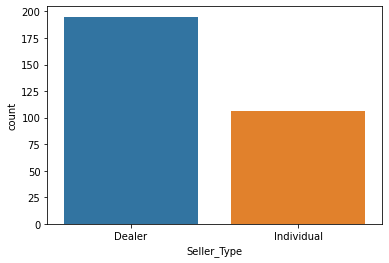

In [14]:
sns.countplot(df['Seller_Type']);

In [15]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

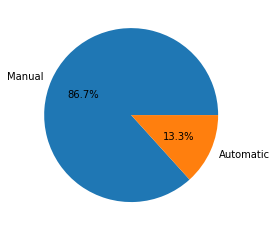

In [16]:
plt.pie(df['Transmission'].value_counts(),labels=['Manual','Automatic'],autopct='%.1f%%');

In [17]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

# Bi-Variate Analysis

In [18]:
df.groupby('Year')['Fuel_Type'].value_counts()

Year  Fuel_Type
2003  Petrol        2
2004  Petrol        1
2005  Petrol        3
      Diesel        1
2006  Petrol        4
2007  Petrol        2
2008  Petrol        7
2009  Petrol        6
2010  Petrol       11
      Diesel        4
2011  Petrol       17
      CNG           1
      Diesel        1
2012  Petrol       16
      Diesel        7
2013  Petrol       28
      Diesel        5
2014  Petrol       24
      Diesel       14
2015  Petrol       45
      Diesel       15
      CNG           1
2016  Petrol       42
      Diesel        8
2017  Petrol       31
      Diesel        4
2018  Diesel        1
Name: Fuel_Type, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='count'>

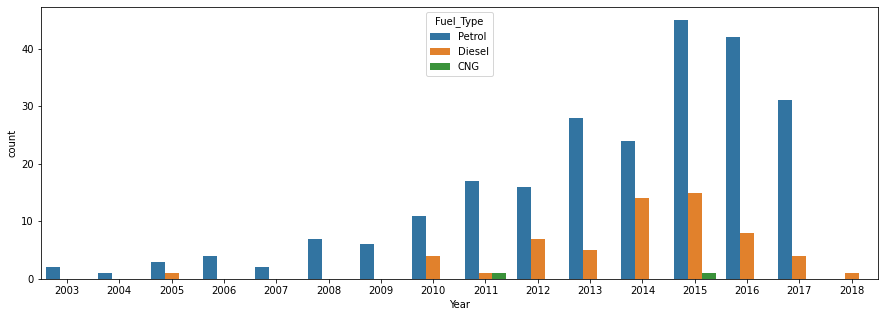

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(df['Year'],hue=df['Fuel_Type'])

In [20]:
sub = df.groupby('Seller_Type')['Transmission'].value_counts()
sub

Seller_Type  Transmission
Dealer       Manual          166
             Automatic        29
Individual   Manual           95
             Automatic        11
Name: Transmission, dtype: int64

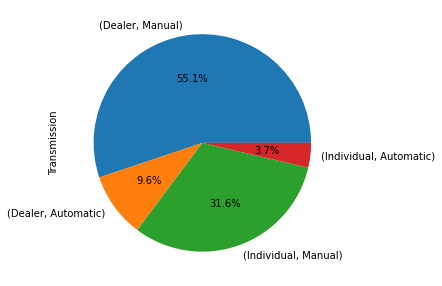

In [21]:
sub.plot.pie(subplots=True,autopct='%.1f%%',figsize=(15,5));

In [22]:
df.groupby('Transmission')['Fuel_Type'].value_counts()

Transmission  Fuel_Type
Automatic     Petrol        28
              Diesel        12
Manual        Petrol       211
              Diesel        48
              CNG            2
Name: Fuel_Type, dtype: int64

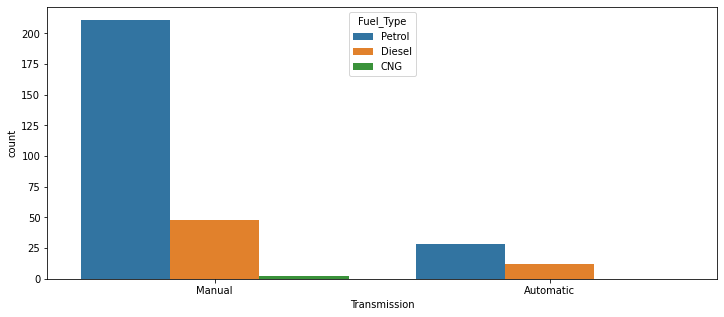

In [23]:
plt.figure(figsize=(12,5))
sns.countplot(df['Transmission'],hue=df['Fuel_Type']);

In [24]:
df.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [25]:
df.groupby('Seller_Type')['Fuel_Type'].value_counts()

Seller_Type  Fuel_Type
Dealer       Petrol       134
             Diesel        59
             CNG            2
Individual   Petrol       105
             Diesel         1
Name: Fuel_Type, dtype: int64

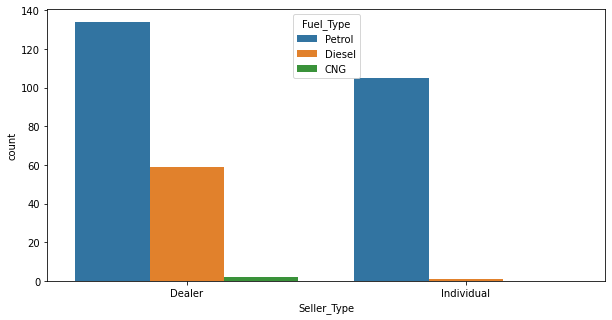

In [26]:
plt.figure(figsize=(10,5))
sns.countplot('Seller_Type',hue=df['Fuel_Type'],data=df);

# Multi-Variate Analysis

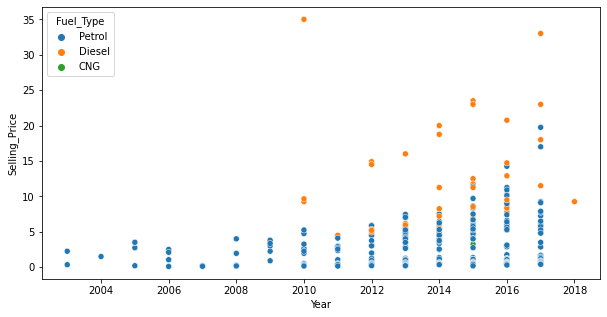

In [27]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Year',y='Selling_Price',hue='Fuel_Type',data=df);

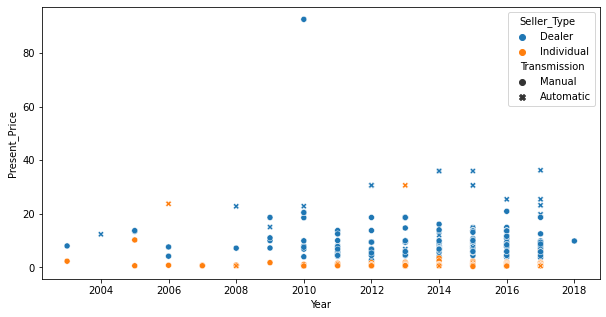

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Year',y='Present_Price',hue='Seller_Type',style='Transmission',data=df);

In [29]:
df.corr(method='spearman')

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.282620,-0.010963,-0.633085,-0.138104
Selling_Price,0.282620,1.000000,0.908251,0.146343,-0.144264
Present_Price,-0.010963,0.908251,1.000000,0.376546,-0.100324
Kms_Driven,-0.633085,0.146343,0.376546,1.000000,0.023536
Owner,-0.138104,-0.144264,-0.100324,0.023536,1.000000


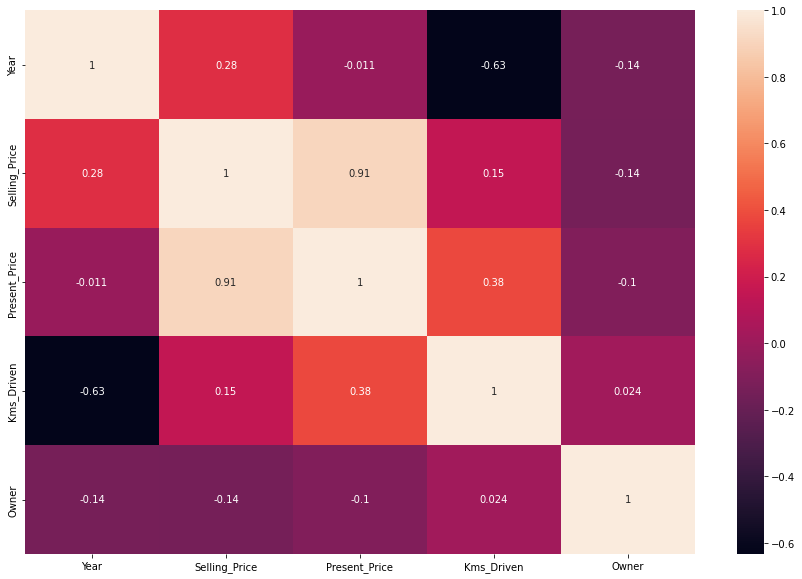

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='spearman'),annot=True);

In [31]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [32]:
df.describe(include='object')

,Car_Name,company,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301,301
unique,98,9,3,2,2
top,city,honda,Petrol,Dealer,Manual
freq,26,70,239,195,261


In [33]:
df.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Split into x and y 

In [34]:
x = df.drop(columns=['Car_Name','Selling_Price'])
y = df['Selling_Price']

# Applying Label Encoder in object type columns of x data

In [35]:
encoder = {}
for i in x.select_dtypes('object').columns:
    encoder[i] = LabelEncoder()
    x[i] = encoder[i].fit_transform(df[i])


# Check Normal Distribution

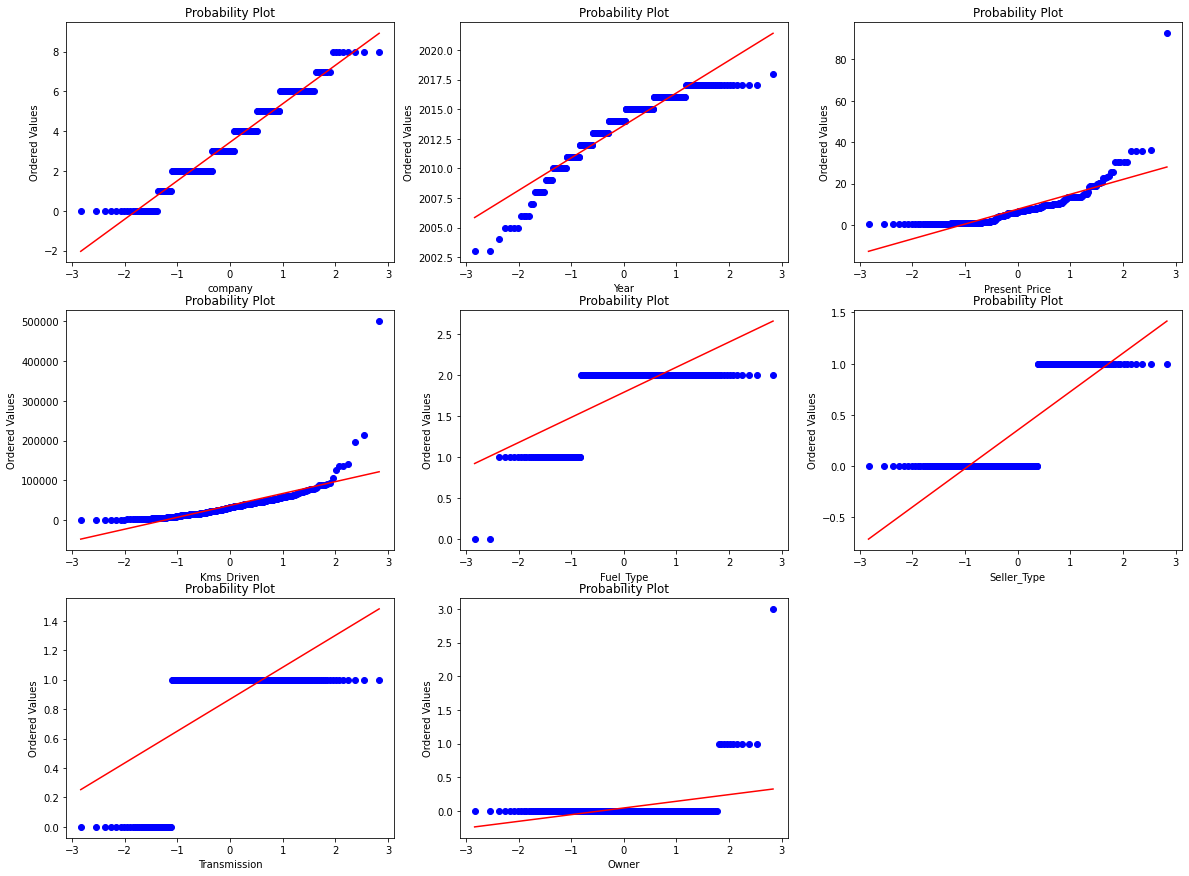

In [36]:
plot=1
plt.figure(figsize=(20,15))
for i in x.select_dtypes(['int','float']).columns:
    plt.subplot(3,3,plot)
    st.probplot(x[i],dist='norm',plot=pylab)
    plt.xlabel(i)
    plot+=1

In [37]:
x.skew()

company          0.188977
Year            -1.246189
Present_Price    4.083150
Kms_Driven       6.436013
Fuel_Type       -1.669601
Seller_Type      0.622146
Transmission    -2.173776
Owner            7.616850
dtype: float64

In [38]:
x.kurtosis()

company          -0.535755
Year              1.533319
Present_Price    31.701024
Kms_Driven       68.563569
Fuel_Type         1.517686
Seller_Type      -1.623768
Transmission      2.743486
Owner            73.325141
dtype: float64

# Feature Scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
x = scaler.fit_transform(x)

# Data divided into train or test

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=42)

In [44]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(255, 8)
(46, 8)
(255,)
(46,)


# Applying Linear Model

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression(normalize=True)

In [47]:
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [48]:
y_pred = lr.predict(x_test)

In [49]:
y_pred[:10]

array([ 3.19715534,  8.4750614 ,  6.23983011, -1.20535458,  8.96198545,
        7.1791741 ,  1.15829207,  0.30524513,  1.62440664,  7.24036188])

In [50]:
y_test[:10]

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
9       7.45
118     1.10
154     0.50
164     0.45
33      6.00
Name: Selling_Price, dtype: float64

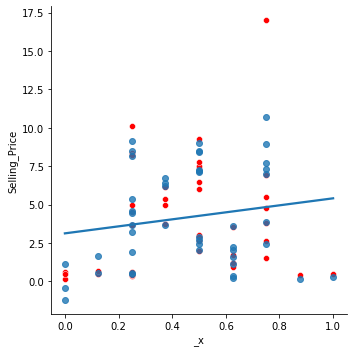

In [51]:
sns.relplot(x_test[:,0],y_test, color= "Red" )
sns.regplot(x_test[:,0],y_pred, ci=False)
plt.show()

# Accuracy of the model

In [52]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [53]:
r2_score(y_test,y_pred)

0.797378444868011

In [54]:
mae = mean_absolute_error(y_test,y_pred)
mae

1.0139742911914653

In [55]:
mape = mean_absolute_percentage_error(y_test,y_pred)
mape

0.9650022685636209

In [56]:
mse = mean_squared_error(y_test,y_pred)
mse

2.430580695490987

# Model Discription

In [57]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

In [58]:
ols = sm.OLS(y,x)

In [59]:
model = ols.fit()

In [60]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Selling_Price   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                              516.7
Date:                Sun, 31 Jul 2022   Prob (F-statistic):                   7.91e-168
Time:                        10:30:08   Log-Likelihood:                         -599.43
No. Observations:                 301   AIC:                                      1215.
Df Residuals:                     293   BIC:                                      1245.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.5772      0.433     -1.333      0.184      -1.429       0.275
x2             6.9787      0.484     14.413      0.000       6.026       7.932
x3            43.0007      1.388     30.979      0.000      40.269      45.733
x4            -1.3994      1.412     -0.991      0.322      -4.179       1.380
x5            -2.2407      0.416     -5.382      0.000      -3.060      -1.421
x6            -1.0122      0.259     -3.915      0.000      -1.521      -0.503
x7            -1.1249      0.292     -3.855      0.000      -1.699      -0.551
x8            -1.9671      1.289     -1.526      0.128      -4.504       0.570
==============================================================================
Omnibus:                       91.636   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              824.341
Skew:                           0.954   Prob(JB):                    9.92e-180
Kurtosis:                      10.879   Cond. No.                         24.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""